In [11]:

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import sklearn.datasets as dt
from sklearn import datasets
import seaborn as sns
# Needed for generating data from an existing dataset
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.preprocessing import MinMaxScaler,StandardScaler, quantile_transform
import copy


## Synthetic Generation of Data

In [2]:

x,y = dt.make_regression(n_samples=200,
                             n_features=1,
                             noise=15,
                             random_state=1)
x.shape



(200, 1)

## Visualize the data points without any Outliers

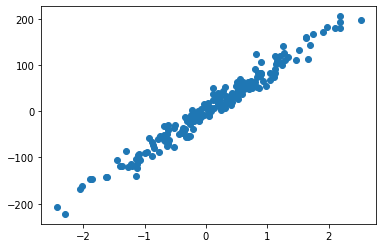

In [12]:
plt.scatter(x,y)

## Fitting a regression line to our model

Coefficient [87.21859652]
Intercept -0.31273696519580696


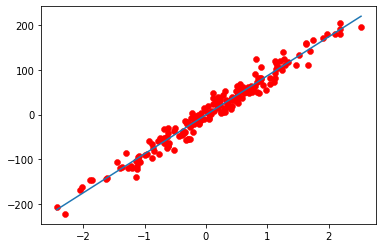

In [13]:
regr = LinearRegression()
regr.fit(x, y)
plt.figure(figsize = (6, 4))
plt.scatter(x, y,color = "red", linewidth=0.5)
plt.plot([x.min(),x.max()],[regr.coef_*x.min()+regr.intercept_,regr.coef_*x.max()+regr.intercept_])
print("Coefficient", regr.coef_)
print("Intercept", regr.intercept_)

## Adding Outliers at extreme X positions in the created data

In [9]:
def showmodel(x,y,numofoutliers,rangeofoutlier,print_graph = False,figuresize = (12,4)):
  
    xwithoutliers = []
    outliersx =[]
    outliersy = []
    ywithoutliers = []
    coeficient = []
    intercept = []
    np.random.seed(0)
    outliersx.append(np.random.uniform(rangeofoutlier[0],rangeofoutlier[1], size = (numofoutliers)))
    outliersx.append(np.random.uniform(-rangeofoutlier[0],-rangeofoutlier[1], size = (numofoutliers)))    
    outliersy.append(np.random.uniform(y.max(),y.max()+numofoutliers, size = (numofoutliers)))
    outliersy.append(np.random.uniform(y.mean(),y.mean()+numofoutliers, size = (numofoutliers)))
    outliersy.append(np.random.uniform(y.min(),y.min()+numofoutliers, size = (numofoutliers)))
    xwithoutliers.append(np.append(x, outliersx[0]))
    xwithoutliers.append(np.append(x, outliersx[1]))
    plt.figure(figsize = figuresize)
    for i in range(6):
        ywithoutliers.append(np.append(y, outliersy[i%3]))
        regr = LinearRegression()
        regr.fit(xwithoutliers[i//3].reshape(-1,1), ywithoutliers[i]) ## // is used to get integer value
        coeficient.append(regr.coef_)
        intercept.append(regr.intercept_)
        if print_graph == True:
            plt.subplot(2,3,i+1)
            plt.scatter(x, y,color = "red", linewidth=1)
            plt.scatter(outliersx[i//3],outliersy[i%3], color = "blue", linewidth = 0.5)
            plt.plot([xwithoutliers[i//3].min(),xwithoutliers[i//3].max()],[int(regr.coef_)*xwithoutliers[i//3].min()+regr.intercept_,int(regr.coef_)*xwithoutliers[i//3].max()+regr.intercept_])
            title = "coeficient: " + str(float(regr.coef_))
            plt.title(title)
    if print_graph == True:
        plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)
        plt.show()
    return coeficient,intercept

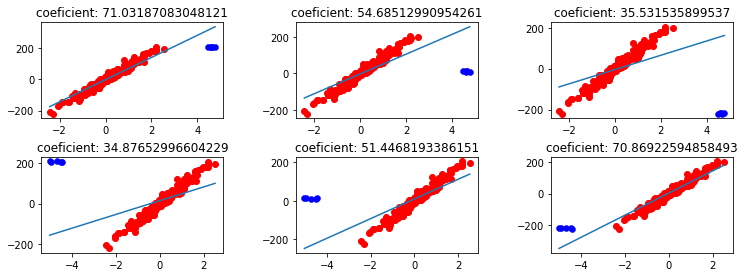

In [10]:
coeficient,intercept = showmodel(x,y,numofoutliers=5,rangeofoutlier = (2*x.max() - 1,2*x.max()) , print_graph=True)

In [14]:
def effectofoutlier(x,y,numofoutliers,rangeofoutlier):    
    table1 = pd.DataFrame({
                'Position':[],
                'Number of outliers': [],
                'Regression coefficient':[],
                'Regression intercept':[],
                
                })
    table2 = pd.DataFrame({
                'Position':[],
                'Number of outliers': [],
                'Regression coefficient':[],
                'Regression intercept':[],
              
                })
    table3 = pd.DataFrame({
                'Position':[],
                'Number of outliers': [],
                'Regression coefficient':[],
                'Regression intercept':[],
                
                })
    table4 = pd.DataFrame({
                'Position':[],
                'Number of outliers': [],
                'Regression coefficient':[],
                'Regression intercept':[],
                
                })
    table5 = pd.DataFrame({
                'Position':[],
                'Number of outliers': [],
                'Regression coefficient':[],
                'Regression intercept':[],
               
                })
    table6 = pd.DataFrame({
                'Position':[],
                'Number of outliers': [],
                'Regression coefficient':[],
                'Regression intercept':[],
                
                })
    for i in range(numofoutliers +1):
        coeficient,intercept,rmse = showmodel(x,y,i,rangeofoutlier )
        table1.loc[len(table1.index )] = [str(1),str(i),coeficient[0], intercept[0]]
        table2.loc[len(table2.index )] = [str(2),str(i),coeficient[1], intercept[1]]
        table3.loc[len(table3.index )] = [str(3),str(i),coeficient[2], intercept[2]]
        table4.loc[len(table4.index )] = [str(4),str(i),coeficient[3], intercept[3]]
        table5.loc[len(table5.index )] = [str(5),str(i),coeficient[4], intercept[4]]
        table6.loc[len(table6.index )] = [str(6),str(i),coeficient[5], intercept[5]]
    table = table1.append(table2.append(table3.append(table4.append(table5.append(table6)))))
    table.set_index(np.arange(len(table.index)),inplace = True)
    return table


In [15]:
table1 = effectofoutlier(x,y,5,(2*x.max() - 1,2*x.max()))
table1

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,Position,Number of outliers,Regression coefficient,Regression intercept
0,1,0,[87.21859651708925],-0.312737
1,1,1,[82.5113748775962],-0.677086
2,1,2,[78.36219099410407],-0.967497
3,1,3,[75.32580819348418],-1.197014
4,1,4,[72.89503315543182],-1.388390
5,1,5,[71.03187083048121],-1.550374
6,2,0,[87.21859651708925],-0.312737
7,2,1,[77.77709794905353],-1.043529
8,2,2,[69.77360867626527],-1.603738
9,2,3,[63.620063537253856],-2.068644


<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

## Increasing the magnitude of outlier

In [17]:
table2 = effectofoutlier(x,y,5,(2.5*x.max() - 1,2.5*x.max()))
table3 = effectofoutlier(x,y,5,(3*x.max() - 1,3*x.max()))
table4 = effectofoutlier(x,y,5,(3.5*x.max() - 1,3.5*x.max()))
table5 = effectofoutlier(x,y,5,(4*x.max() - 1,4*x.max()))
table = table1.drop(['Regression coefficient','Regression intercept'], axis = 1)
table["Regression coefficient for range (2,5)"] = table1['Regression coefficient']
table["Regression coefficient for range (5.3,6.3)"] = table2['Regression coefficient']
table["Regression coefficient for range (6.5,7.5)"] = table3['Regression coefficient']
table["Regression coefficient for range (7.8,8.8)"] = table4['Regression coefficient']
table["Regression coefficient for range (9.1,10.1)"] = table5['Regression coefficient']
table

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

,Position,Number of outliers,"Regression coefficient for range (2,5)","Regression coefficient for range (5.3,6.3)","Regression coefficient for range (6.5,7.5)","Regression coefficient for range (7.8,8.8)","Regression coefficient for range (9.1,10.1)"
0,1,0,[87.21859651708925],[87.21859651708925],[87.21859651708925],[87.21859651708925],[87.21859651708925]
1,1,1,[82.5113748775962],[78.39817557830092],[73.67938450879846],[68.67225733900936],[63.62803392877612]
2,1,2,[78.36219099410407],[71.71388265510434],[64.82209809282261],[58.19434188628596],[52.10274206024243]
3,1,3,[75.32580819348418],[67.11411815276034],[59.16389615717184],[51.9782895909749],[45.71899588966846]
4,1,4,[72.89503315543182],[63.64266713432849],[55.13435865897117],[47.773965325571886],[41.58687889484536]
5,1,5,[71.03187083048121],[61.047974570673496],[52.221247173294714],[44.826863337350524],[38.76525506101897]
6,2,0,[87.21859651708925],[87.21859651708925],[87.21859651708925],[87.21859651708925],[87.21859651708925]
7,2,1,[77.77709794905353],[72.72756274149869],[67.28282011446431],[61.74633368726051],[56.344727924885]
8,2,2,[69.77360867626527],[61.98165771747522],[54.429909593639834],[47.51247413922343],[41.39404871478819]
9,2,3,[63.620063537253856],[54.353816055820666],[46.024457461992206],[38.90101077092453],[32.967176792603546]


<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

## Detecting and removing outliers

## Using scatter plot

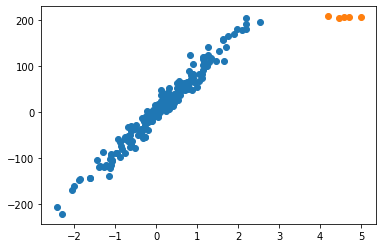

In [18]:
outlierx = np.random.uniform(2*x.max() - 1,2*x.max(), size = (5))
outliery = np.random.uniform(y.max(),y.max()+5, size = (5))
xwithoutlier = np.append(x,outlierx)
ywithoutlier = np.append(y,outliery)
plt.scatter(x,y)
plt.scatter(outlierx,outliery)

## Using boxplot

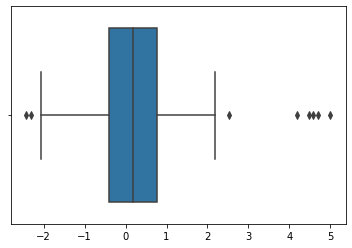

In [19]:
sns.boxplot(x=xwithoutlier)

## Using zscore value

In [20]:
z = np.abs(stats.zscore(xwithoutlier))
print(z)

[1.45111434e-02 2.24456045e-01 2.94764129e-01 2.53037906e-01
 1.73676376e+00 2.54783779e-01 4.26415890e-01 1.62442401e+00
 2.76980134e-01 4.11019822e-02 7.60408213e-01 2.61625008e-01
 5.75286513e-01 5.81703937e-01 2.80014746e-01 1.54301182e+00
 8.98924326e-01 5.08246985e-01 2.01518135e-01 1.15517246e+00
 7.29982845e-01 6.12954121e-02 3.32691009e-01 1.34713439e+00
 1.40032148e+00 9.63909381e-01 6.03457645e-01 2.87682027e-01
 2.56950608e-01 8.32108468e-01 1.27426063e+00 4.62204979e-01
 4.51752514e-01 1.82757428e+00 2.19660374e-03 1.97228105e+00
 1.42343204e-01 5.24235820e-01 8.88653008e-01 3.86269397e-01
 1.74004182e+00 7.81846824e-01 1.79985807e-01 1.13583654e+00
 1.19872877e+00 1.98563049e-01 1.24098184e+00 2.12050309e-01
 1.14887341e+00 8.44767149e-02 3.40393187e-01 5.21051834e-01
 7.81332352e-01 7.53194628e-01 6.55772583e-01 6.04105111e-01
 1.82816289e-01 4.81110451e-01 9.47746362e-01 3.10590688e-01
 6.90188334e-02 6.30109924e-01 3.89781868e-01 8.66103774e-01
 9.82894658e-01 4.636269

In [21]:
print(np.where(z > 3))

(array([200, 201, 202, 203, 204]),)


## With multiple features

In [58]:
np.random.seed(7)
xm = pd.DataFrame()
xm['Feature1'] = np.random.normal(loc = np.random.randint(1,10), scale = np.random.randint(1,5), size = (1000) )
xm['Feature2'] = np.random.uniform(low = np.random.randint(1,5), high = np.random.randint(5,10), size = (1000) )
xm['Feature3'] = np.random.uniform(low = np.random.randint(-5,-1), high = np.random.randint(-10,-5), size = (1000))
xm['Feature4'] = np.random.gamma(shape = np.random.randint(1,10), scale = np.random.randint(1,5), size = (1000) )
ym = (xm*np.random.uniform(low = 1, high = 3, size = (4))).sum(axis = 1) + np.random.uniform(1,5,size = (1000))
xm 

,Feature1,Feature2,Feature3,Feature4
0,1.239555,7.242226,-5.580469,12.591371
1,4.130044,2.324369,-6.698615,7.741838
2,4.229063,1.159379,-5.479135,13.894683
3,4.559497,5.479608,-5.921587,17.503290
4,4.461068,8.136870,-6.437736,1.423128
...,...,...,...,...
995,6.739709,8.430566,-5.173167,7.904259
996,6.587049,2.566936,-6.499349,17.820095
997,4.625521,8.025549,-5.290160,2.810972
998,7.760513,7.366398,-6.576235,8.831902


## Lets add outliers in different columns

In [59]:
#Here outliers are added at distance of 25 in rows.
xmwithoutlier = copy.deepcopy(xm)
i = 0
for column in xmwithoutlier.columns:
    if i % 2 == 0:
        
        xmwithoutlier[column][np.arange(0,1000,25)] = np.random.uniform(2*xmwithoutlier[column].min() - 1,2*xmwithoutlier[column].min(),size = (40))  
    else:
        xmwithoutlier[column][np.arange(0,1000,25)] = np.random.uniform(2*xmwithoutlier[column].max() - 1,2*xmwithoutlier[column].max(),size = (40))
    
    i += 1

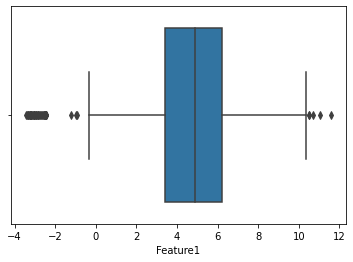

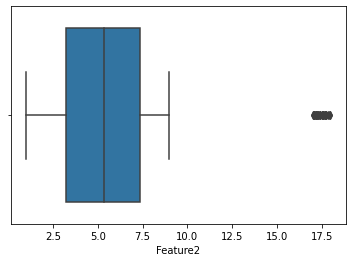

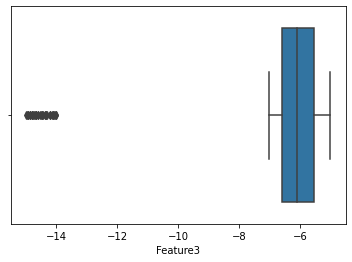

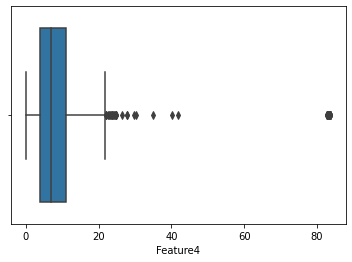

In [60]:
for column in xmwithoutlier.columns:
    sns.boxplot(x=xmwithoutlier[column])
    plt.show()

In [61]:
z = np.abs(stats.zscore(xmwithoutlier))
print(np.where(z > 3))

(array([  0,   0,   0,  25,  25,  25,  50,  50,  50,  75,  75,  75,  75,
       100, 100, 100, 100, 125, 125, 125, 150, 150, 150, 150, 175, 175,
       175, 200, 200, 200, 200, 225, 225, 225, 225, 250, 250, 250, 250,
       275, 275, 275, 300, 300, 300, 300, 325, 325, 325, 350, 350, 350,
       350, 375, 375, 375, 400, 400, 400, 400, 425, 425, 425, 450, 450,
       450, 475, 475, 475, 500, 500, 500, 500, 525, 525, 525, 525, 550,
       550, 550, 575, 575, 575, 575, 600, 600, 600, 600, 625, 625, 625,
       625, 650, 650, 650, 675, 675, 675, 675, 700, 700, 700, 700, 725,
       725, 725, 725, 750, 750, 750, 750, 775, 775, 775, 800, 800, 800,
       800, 825, 825, 825, 850, 850, 850, 850, 875, 875, 875, 875, 900,
       900, 900, 900, 925, 925, 925, 925, 950, 950, 950, 950, 975, 975,
       975, 975]), array([1, 2, 3, 1, 2, 3, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 1, 2, 3, 0, 1,
       2, 3, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 1, 2, 3, 0, 1,
       2, 3, 1, 2, 3, 0, 1, 2, 3, 1, 2, 3,

 First and second  array are row and column numbers for outliers

In [62]:
zxwithoutoutlier = xmwithoutlier[(z < 3).all(axis=1)]

In [63]:
zxwithoutoutlier.head(55)

,Feature1,Feature2,Feature3,Feature4
1,4.130044,2.324369,-6.698615,7.741838
2,4.229063,1.159379,-5.479135,13.894683
3,4.559497,5.479608,-5.921587,17.503290
4,4.461068,8.136870,-6.437736,1.423128
5,4.910238,3.003071,-6.998611,4.816982
6,7.190249,2.493327,-5.726354,9.007512
7,5.164890,8.052806,-5.664990,12.204003
8,2.953455,3.721036,-6.066510,6.333646
9,1.766275,3.823894,-6.842899,4.901148
10,7.374155,5.871079,-6.987097,22.116211


Here we can see the 0th,25th and 50th.... rows are not present cause we added otliers at these positions previously

In [64]:
zxwithoutoutlier.shape

(960, 4)

## Using IQR(Interquartile range) score

In [75]:
Q1 = xmwithoutlier.quantile(0.2)
Q3 = xmwithoutlier.quantile(0.8)
IQR = Q3 - Q1
print(IQR)

Feature1    3.553876
Feature2    4.975897
Feature3    1.230372
Feature4    9.015839
dtype: float64


In [76]:
print(xmwithoutlier < (Q1 - 1.5 * IQR)) or (xmwithoutlier > (Q3 + 1.5 * IQR))

     Feature1  Feature2  Feature3  Feature4
0        True     False      True     False
1       False     False     False     False
2       False     False     False     False
3       False     False     False     False
4       False     False     False     False
..        ...       ...       ...       ...
995     False     False     False     False
996     False     False     False     False
997     False     False     False     False
998     False     False     False     False
999     False     False     False     False

[1000 rows x 4 columns]


,Feature1,Feature2,Feature3,Feature4
0,False,True,False,True
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
995,False,False,False,False
996,False,False,False,False
997,False,False,False,False
998,False,False,False,False


In [77]:
ixwithoutoutlier = xmwithoutlier[~((xmwithoutlier < (Q1 - 1.5 * IQR)) |(xmwithoutlier > (Q3 + 1.5 * IQR))).any(axis=1)]
ixwithoutoutlier

,Feature1,Feature2,Feature3,Feature4
1,4.130044,2.324369,-6.698615,7.741838
2,4.229063,1.159379,-5.479135,13.894683
3,4.559497,5.479608,-5.921587,17.503290
4,4.461068,8.136870,-6.437736,1.423128
5,4.910238,3.003071,-6.998611,4.816982
...,...,...,...,...
995,6.739709,8.430566,-5.173167,7.904259
996,6.587049,2.566936,-6.499349,17.820095
997,4.625521,8.025549,-5.290160,2.810972
998,7.760513,7.366398,-6.576235,8.831902


## Effect of outliers on normalization of covariates

Let's see the effect on min max normalization

$$
    X_{norm} =  \frac{X - X_{min}}{X_{max}-X_{min}}\
$$

Let's check the mean and standard deviation of each covariate after normalizing the covariates.

In [78]:
scaling = MinMaxScaler()
xnorm = pd.DataFrame(scaling.fit_transform(xm))
xnorm.columns = xm.columns
meanwno = []

stdwno = []
for col in xnorm.columns:
    meanwno.append(xnorm[col].mean())
    stdwno.append(xnorm[col].std())
    print('For {} Min: {}. Mean: {}. Max: {}.  Std :{} .'.format(col, xnorm[col].min(), xnorm[col].mean(), xnorm[col].max(),  xnorm[col].std()))

For Feature1 Min: 0.0. Mean: 0.4846416138078234. Max: 1.0.  Std :0.15629745360142075 .
For Feature2 Min: 0.0. Mean: 0.5121599762173525. Max: 1.0.  Std :0.28929885133753963 .
For Feature3 Min: 0.0. Mean: 0.49279566250037693. Max: 1.0.  Std :0.28796671494812326 .
For Feature4 Min: 0.0. Mean: 0.18760009874606362. Max: 0.9999999999999999.  Std :0.13070387502661152 .


Let's see how the magnitude  of outliers affect the normalization of covariates.

In [84]:
# We are adding outliers greater than maximum value on odd feature number and outliers have magnitude smaller than the minimum value on even feature number.
def eon(temp,mcofs):
    minn = []
    mean = []
    std = []
    maxx = []
    for k in range(len(mcofs)):
        xnwithoutlier = temp
        minn.append([])
        mean.append([])
        maxx.append([])
        std.append([])
        i = 0
        for col in xnwithoutlier.columns:
            if i % 2 == 0:
                xnwithoutlier[col][np.arange(0,200,10)] = np.random.uniform(mcofs[k]*xnwithoutlier[col].min() - 1,mcofs[k]*xnwithoutlier[col].min(),size = (20))  
            else:
                xnwithoutlier[col][np.arange(0,200,10)] = np.random.uniform(mcofs[k]*xnwithoutlier[col].max() - 1,mcofs[k]*xnwithoutlier[col].max(),size = (20))
            
            mean[k].append(scaling.fit_transform(xnwithoutlier[[col]]).mean()) 
            std[k].append(scaling.fit_transform(xnwithoutlier[[col]]).std())  
            i += 1
    return mean, std

In [85]:
normtable = pd.DataFrame({'Feature':[],
                          
                         'Mean without outlier':[],
                         'Mean for coef: 1.5': [],
                         'Mean for coef: 2':[],
                         'Mean for coef: 2.5':[],
                                          
                         'Std without outlier':[],
                         'Std for coef: 1.5': [],
                         'Std for coef: 2':[],
                         'Std for coef: 2.5':[]})
                         
normtable['Mean without outlier'] = meanwno
normtable['Std without outlier'] = stdwno
normtable['Feature'] = xm.columns

mcofs = [1.5,2,2.5]
ele = np.array(eon(xm,mcofs))

normtable.iloc[:, 2:5] = ele[0].T
normtable.iloc[:, 6:] = ele[1].T
normtable  

,Feature,Mean without outlier,Mean for coef: 1.5,Mean for coef: 2,Mean for coef: 2.5,Std without outlier,Std for coef: 1.5,Std for coef: 2,Std for coef: 2.5
0,Feature1,0.484642,0.922032,0.949565,0.967430,0.156297,0.132317,0.135642,0.138150
1,Feature2,0.512160,0.025335,0.022664,0.021066,0.289299,0.139203,0.139582,0.139833
2,Feature3,0.492796,0.978304,0.979157,0.979664,0.287967,0.139650,0.139819,0.139929
3,Feature4,0.187600,0.022176,0.021088,0.020435,0.130704,0.139681,0.139839,0.139935


for coef N means, the range of outliers used are in range of (N* x.min() - 1, N* x.min) for Feature1 and Feature4 & for Feature1 and Feature3 range of outliers are in range of (N* x.max() - 1, N* x.max).